## NOTEBOOK 2
### Giorgio Stucchi - 969107

In [1]:
# importazione librerie
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
import warnings
import string
from scipy.optimize import curve_fit
warnings.filterwarnings('ignore')
params = {'legend.fontsize': 'x-large', 'figure.figsize': (10, 6), 'axes.labelsize': 'x-large', 'axes.titlesize':'xx-large', 'xtick.labelsize':'x-large', 'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

### Importance sampling
We want to compute the following 1D integral via Monte Carlo 
$$I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx = 1$$

First, we start with the 'standard' Montecarlo method, i.e. by sampling a uniform distribution on (0,1). By 'standard' we mean that, given an integral of the form $$I = \int_\Omega g(x)p(x) dx $$
with $p(x)$ a probability distribution, the computation consists simply in averaging the evaluations of $g(x)$ at n different points $x_{i}$ randomly sampled with $p(x)$:
$$I = \frac{1}{n}\sum_{i=1}^n g(x_{i}) $$.

Thereafter, we compute the same integral by means of importance sampling and observe how the uncertainty alterates. In order to do this, we need to choose a probability distribution as similar as possible to the integrand (and that admits an analytical inverse to the cumulative function). The pdf chosen is $-2(x-1)$, which is neither the Taylor expansion of the integrand nor the straight line passing for the same y as the integrand in 0 and 1. It is somewhat in between this two option in order to guarantee better similarity to the integrand.
The function to evaluate is now 
$$g(x) = \frac{(\frac{\pi}{2}\cos(\pi x/2))}{p(x)} = \frac{(\frac{\pi}{2}\cos(\pi x/2))}{2-2x}$$
It's cumulative's inverse is $1 - \sqrt{1 - y}$ (where y will be distributed uniformly between 0 and 1).
A picture of both estimations of $I$</span> and their uncertainties with a large number of *throws* $M$ ($M=10^4$) as a function of the number of blocks, $N$</font>, is shown. Notice how the second method reduces the statistical uncertainty by a factor $\approx 10$.

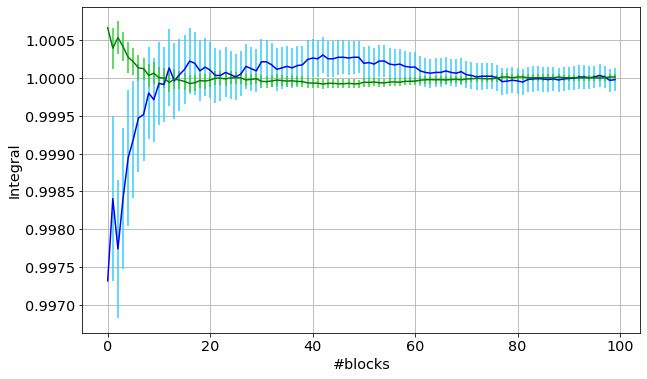

In [10]:
f, error = np.loadtxt("integrals&uncertainties.txt", usecols=(0,1), delimiter=' ', unpack='true')
g, error2 = np.loadtxt("integrals&uncertainties2.txt", usecols=(0,1), delimiter=' ', unpack='true')
x = np.arange(len(f))
plt.errorbar(x,f,yerr=error, color= 'blue', ecolor='#33ccff')
plt.errorbar(x,g,yerr=error2, color= 'green', ecolor='#33cc33')
plt.xlabel('#blocks')
plt.ylabel('Integral')
plt.grid(True)
plt.show()

### Random Walks
- Two different 3d random walks are simulated. In the first RW the walker is allowed to take steps of fixed lenght $a$, forward or backward, but only in direction x, y or z. The same is true for the second RW, but instead of discrete directions, the walker can now move in any possible direction ( $\theta \in [0,\pi]$ and $\phi \in [0,2\pi]$ ). In both cases we can observe the same behaviour.

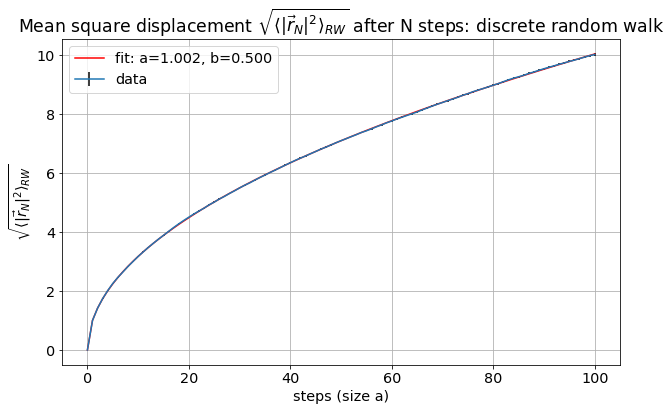

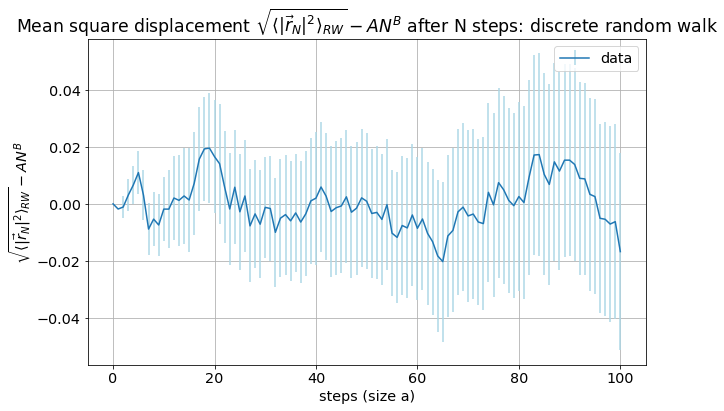

In [30]:
def power_law(x, a, b):
    return a * np.power(x, b)


# Load data
f, error = np.loadtxt("data_exercise_2.2.1.txt", usecols=(0,1), delimiter=' ', unpack='true')
f = np.insert(f, 0, 0)
error = np.insert(error, 0, 0)
x = np.arange(len(f))

# Plot data with error bars
plt.errorbar(x, f, yerr=error, ecolor='k', label='data')

# Fit curve to data
popt, pcov = curve_fit(power_law, x, f)
plt.plot(x, sqrt_func(x, *popt), 'r-', label='fit: a=%5.3f, b=%5.3f' % tuple(popt))

# Add axis labels and legend
plt.xlabel('steps (size a)')
plt.ylabel('mean root of squared displacement (unit: step size a)')
plt.title(r'Mean square displacement $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ after N steps: discrete random walk')
plt.grid(True)
plt.ylabel(r'$\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$')
plt.legend()

plt.show()


# Plot data with error bars
plt.errorbar(x, f - power_law(x, *popt), yerr=error, ecolor='lightblue', label='data')

# Add axis labels and legend
plt.xlabel('steps (size a)')
plt.title(r'Mean square displacement $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}} - AN^B$ after N steps: discrete random walk')
plt.ylabel(r'$\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}} -AN^B$')
plt.grid(True)
plt.legend()

plt.show()

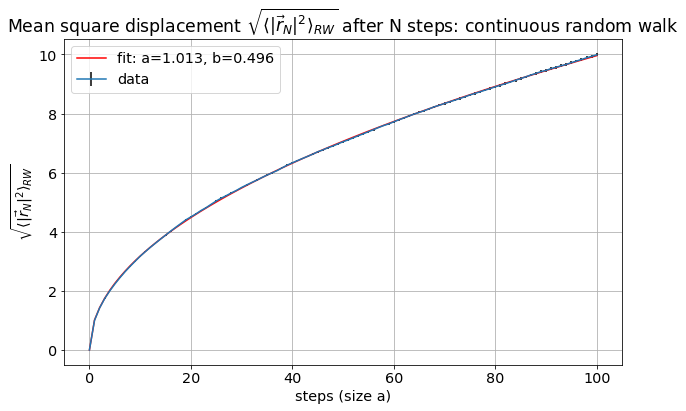

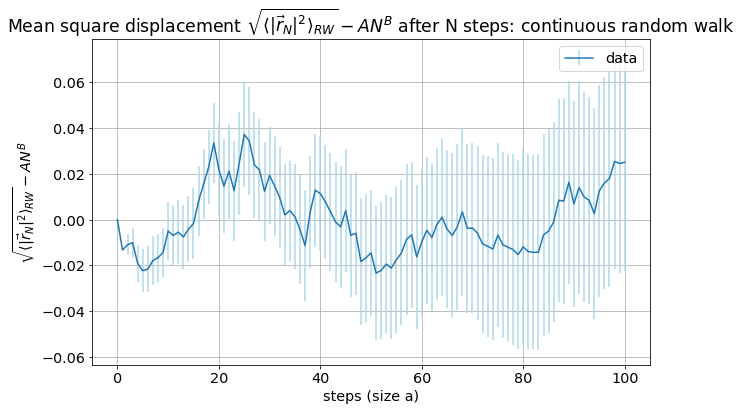

In [33]:
# Load data
f, error = np.loadtxt("data_exercise_2.2.2.txt", usecols=(0,1), delimiter=' ', unpack='true')
f = np.insert(f, 0, 0)
error = np.insert(error, 0, 0)
x = np.arange(len(f))

# Plot data with error bars
plt.errorbar(x, f, yerr=error, ecolor='k', label='data')

# Fit curve to data
popt, pcov = curve_fit(power_law, x, f)
plt.plot(x, sqrt_func(x, *popt), 'r-', label='fit: a=%5.3f, b=%5.3f' % tuple(popt))

# Add axis labels and legend
plt.xlabel('steps (size a)')
plt.ylabel('mean root of squared displacement (unit: step size a)')
plt.title(r'Mean square displacement $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ after N steps: continuous random walk')
plt.grid(True)
plt.ylabel(r'$\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$')
plt.legend()

plt.show()


# Plot data with error bars
plt.errorbar(x, f - power_law(x, *popt), yerr=error, ecolor='lightblue', label='data')

# Add axis labels and legend
plt.xlabel('steps (size a)')
plt.title(r'Mean square displacement $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}} - AN^B$ after N steps: continuous random walk')
plt.ylabel(r'$\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}} -AN^B$')
plt.grid(True)
plt.legend()

plt.show()

The mean square displacement grows in a typical diffusive way. As a matter of fact, by fitting the mean square displacement with a power law $AN^B$, with N number of steps, we see that the best parameters are the step length $a$ as coefficient and $0.5$ as exponent. Therefore we have a $1/2$ power law, typical of a diffusive behaviour, with diffusive constant $D=a^2/(2\tau)$ ($\tau$ time needed for a single step). Also notice how the errors increase with the step number: the more numerous the steps, the more variety is present for the path, leading to greater uncertainties.
